## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?
Check [here](https://www.geeksforgeeks.org/how-to-create-a-poisson-probability-mass-function-plot-in-python/) how to create a poisson distribution and how to calculate the expected observations, using the probability mass function (pmf). 
A Poisson distribution is a discrete probability distribution. It gives the probability of an event happening a certain number of times (k) within a given interval of time or space. The Poisson distribution has only one parameter, λ (lambda), which is the mean number of events.

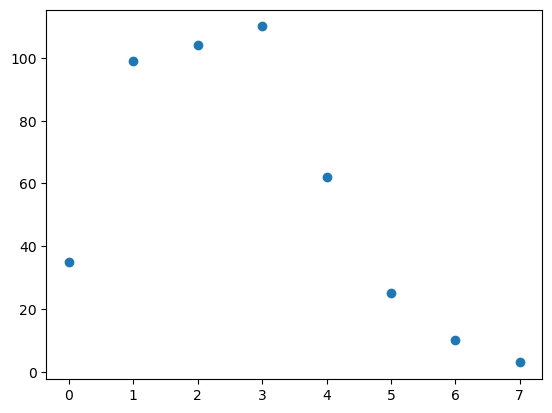

In [1]:
# your answer here

from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

y = [35, 99, 104, 110, 62, 25, 10, 3]
 
x = np.arange(0, 8)

# plotting the scatter plot graph
plt.scatter(x, y)
plt.show()

In [2]:
from scipy.stats import poisson, chisquare

# Given data
observed_frequencies = [35, 99, 104, 110, 62, 25, 10, 3]
mean_parameter = 2.435
sample_size = sum(observed_frequencies)

# Calculate Poisson PMFs for scores 0 to 6
poisson_pmfs = [poisson.pmf(i, mean_parameter) for i in range(7)]

# Calculate complementary probability for 7 or more scores
complementary_pmf = 1 - sum(poisson_pmfs)

# Calculate expected frequencies by scaling the probabilities
expected_frequencies = [freq * sample_size for freq in poisson_pmfs] + [complementary_pmf * sample_size]

# Perform the chi-square test
chi_square_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies, ddof=1)

print("Chi-square statistic:", chi_square_statistic)
print("P-value:", p_value)

# We got a p-value of 37%, so we don't reject the null. We can say that that is a Poisson distribution.

Chi-square statistic: 6.491310681109821
P-value: 0.3704570948410621


## Question 2
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [3]:
#your answer here

import scipy.stats as st


patterns = [[32,12],
          [14,22],
          [6,9]]

chi2_statistic, p_value, dof, expected = st.chi2_contingency(patterns)

print("P-value:", p_value)
print("Expected:", expected)

# We got a p-value less than 5%, so we can say that there is a association between the variables of physical activity and the sugary drinks.

P-value: 0.004719280137040844

Expected: [[24.08421053 19.91578947]
 [19.70526316 16.29473684]
 [ 8.21052632  6.78947368]]
